In [841]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import math
from matplotlib.patches import Circle


plt.rcParams['font.family'] = 'sans-serif'


# Data

In [493]:
## Define box size
N = N
rho_star = 0.25
L  =(np.sqrt(N/(rho_star)))

In [494]:
### Open data and set numpy arrays

prefix = "/Users/leo/C++/Outputs/300_R2FT"
with open(prefix +'_xtraj.txt', 'r') as file: 
    x = [float(line.rstrip()) for line in file]
with open(prefix +'_ytraj.txt', 'r') as file: 
    y = [float(line.rstrip()) for line in file]
with open(prefix +'_vxtraj.txt', 'r') as file: 
    vx= [float(line.rstrip()) for line in file]
with open(prefix +'_vytraj.txt', 'r') as file: 
    vy = [float(line.rstrip()) for line in file]
with open(prefix +'_KE.txt', 'r') as file: 
    KE = [float(line.rstrip()) for line in file]
with open(prefix +'_PE.txt', 'r') as file: 
    PE = [float(line.rstrip()) for line in file]

x = np.array(x)
y = np.array(y)
vx = np.array(vx)
vy = np.array(vy)
KE = np.array(KE)
PE = np.array(PE)

x.shape

x = x.reshape((int)(x.size/(3*N)), 3*N)
y = y.reshape((int)(x.size/(3*N)), 3*N)
vx = vx.reshape((int)(x.size/(3*N)), 3*N)
vy = vy.reshape((int)(x.size/(3*N)), 3*N)

s = np.min([x.size, y.size, vx.size, vy.size])
len = (int)(np.floor(s/(3*N))*3*N)
x = x[0:len].reshape((int)(len/3/N), (3*N))
y = y[0:len].reshape((int)(len/3/N), (3*N))
vx = vx[0:len].reshape((int)(len/3/N), (3*N))
vy = vy[0:len].reshape((int)(len/3/N), (3*N))


In [497]:
## COMPUTE TEMPERATURE (instantaneous)

T = KE*2/3/N #3/2 KE/N = T*, KE of each 

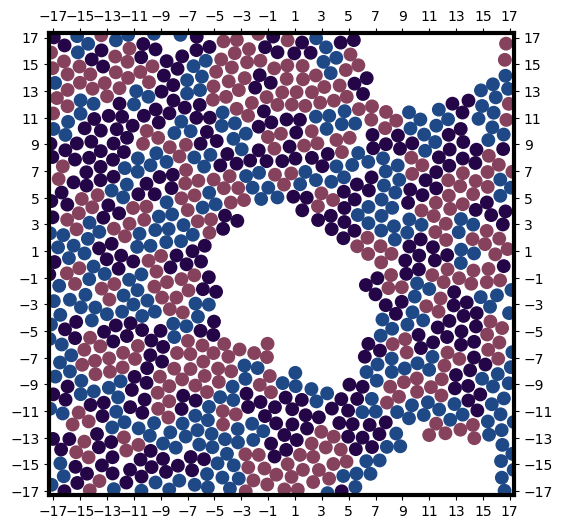

In [498]:
### Visualize one state

def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(-1) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])


L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 1
ss = 80

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)


plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

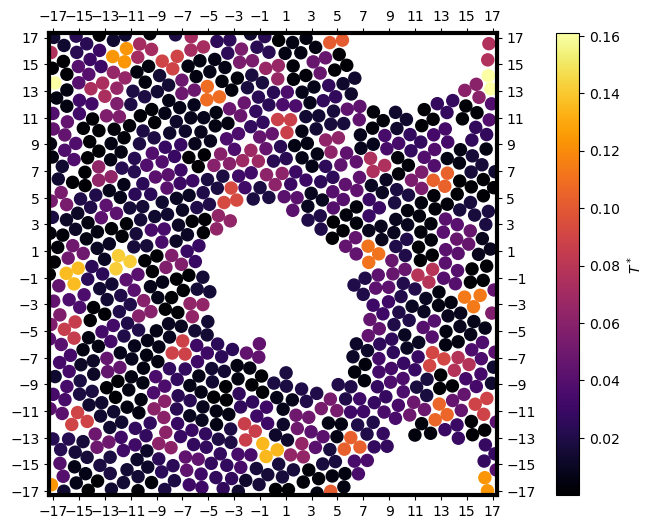

In [499]:
## Temperature cmap state 

vx_COM = (vx0 + vx00 + vx000)/3
vy_COM = (vy0 + vy00 + vy000)/3
speed_COM = np.sqrt(vx_COM**2 + vy_COM**2)
temp_COM = (vx_COM**2 + vy_COM**2)/2*2/3

norm = mcolors.Normalize(vmin = temp_COM.min(), vmax = temp_COM.max())
cmap = cm.inferno
colors = cmap(norm(temp_COM))

ss = 75 ### 75 for N=N, 110 for N=200
alph = 1.0

plt.figure(figsize = (7.7,6))
plt.scatter(x0, y0, color = colors, s = ss, alpha = alph)
plt.scatter(x00, y00, color = colors, s = ss, alpha = alph)
plt.scatter(x000, y000, color = colors, s = ss, alpha = alph)




plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


# --- everything above unchanged ---
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

sm = cm.ScalarMappable(norm=norm, cmap=cmap) 
sm.set_array([])                              
cbar = plt.colorbar(sm, ax=ax, pad=0.1)      
# cbar.set_label(r"$|v_{COM}|/\sqrt{\epsilon/m}$") ## Speed Label
cbar.set_label(r"$T^*$")


plt.show()

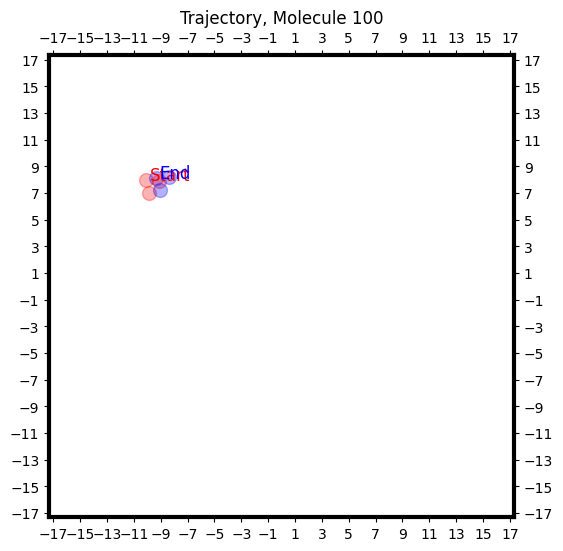

In [826]:
##Single Particle trajectory 

plt.figure(figsize=(6, 6))

magnitude = np.sqrt(xt**2 + yt**2)
u = vxt
v = vyt

n = 100### molecule tracked

plt.scatter(x[:,n], y[:,n], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n], y[0,n], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n], y[-1,n], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+N], y[:,n+N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+N], y[0,n+N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+N], y[-1,n+N], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+2*N], y[:,n+2*N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+2*N], y[0,n+2*N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+2*N], y[-1,n+2*N], s = 100, color = 'b', alpha = 0.3)

plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.text(x[0,n]+0.3, y[0,n], "Start", color = 'red', fontsize = 12)
plt.text(x[-1,n]+0.3, y[-1,n], "End", color = 'blue', fontsize = 12)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.title(f"Trajectory, Molecule {n}")

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

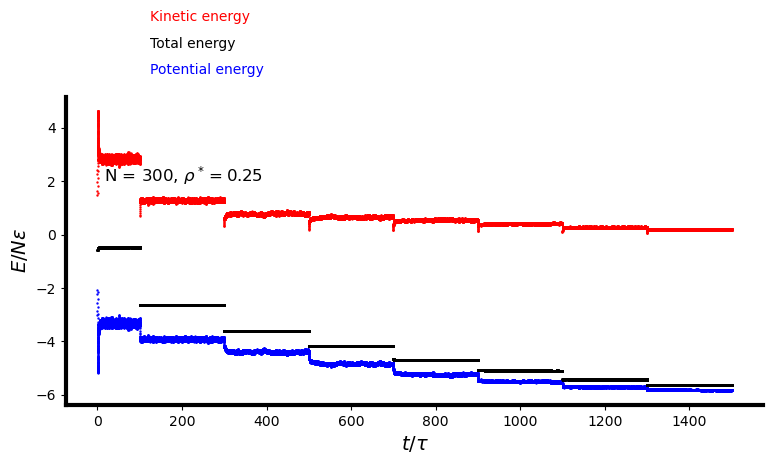

In [503]:
##Kinetic and Potential Energies 

tlim = 1500 ##plot 0 to this time in \tau
tlimsteps =(int) (tlim/0.01);
plt.figure(figsize = (9, 4))
time = np.linspace(0,tlim, (int)(tlim/0.01))
### Modify for density of energy computations
# time1 = np.linspace(0, 0.1, 100)
# time2 = np.linspace(0.1, 100, KE.size - 100)
# time = np.append(time1, time2)
# time = np.arange(0,tlim, 0.01)
plt.scatter(time, KE[0:tlimsteps]/(N), color = 'r',  s = 0.5)
plt.scatter(time, PE[0:tlimsteps]/N, color = 'b', s = 0.5)
plt.scatter(time, (PE[0:tlimsteps] + KE[0:tlimsteps])/N, color = 'k', s = 0.5)

# plt.xscale('log')
plt.text(125, 8, "Kinetic energy", color = 'red')
plt.text(125, 7, "Total energy", color = 'black')
plt.text(125, 6, "Potential energy", color = 'blue')

plt.text(15, 2, f"N = {N}, $\\rho^* = {rho_star}$", fontsize =12)
plt.xlabel("$t/\\tau$", fontsize = 14)
plt.ylabel("$E/N\\epsilon$", fontsize = 14)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)


plt.show()


# Radial Distribution Function

In [549]:
def periodic(sep):
    return np.where(sep > L / 2, sep - L,
           np.where(sep < -L / 2, sep + L, sep))


In [550]:
x1 = (np.array(x[:,0:N])+(L/2))*(2*np.pi)/L
x2 = (np.array(x[:,N:2*N])+(L/2))*(2*np.pi)/L
x3 = (np.array(x[:,2*N:3*N])+(L/2))*(2*np.pi)/L
y1 = (np.array(y[:,0:N])+(L/2))*(2*np.pi)/L
y2 = (np.array(y[:,N:2*N])+(L/2))*(2*np.pi)/L
y3 = (np.array(y[:,2*N:3*N])+(L/2))*(2*np.pi)/L

z_x = np.angle((np.exp(1j*x1) + np.exp(1j*x2) + np.exp(1j*x3))/3)
z_y = np.angle((np.exp(1j*y1) + np.exp(1j*y2) + np.exp(1j*y3))/3)

x_COM = (z_x*L/(2*np.pi))%L - (L/2)
y_COM = (z_y*L/(2*np.pi))%L - (L/2)


In [551]:
## Compute g(r) with COM
gr_x = x_COM
gr_y = y_COM

def compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, t_start, t_end):
    T_range = t_end - t_start
    N = gr_x.shape[1]
    num_bins = int(np.ceil(hk_lim / dr))
    h_total = np.zeros(num_bins)

    for t in range(t_start, t_end):
        x = gr_x[t]
        y = gr_y[t]

        dx = periodic(x[:, np.newaxis] - x[np.newaxis, :])
        dy = periodic(y[:, np.newaxis] - y[np.newaxis, :])

        i, j = np.triu_indices(N, k=1)

        r_ij = np.sqrt(dx[i, j]**2 + dy[i, j]**2)
        r_ij = r_ij[r_ij < hk_lim]  # cutoff

        k = np.floor(r_ij / dr).astype(int)
        np.add.at(h_total, k, 2)  

    h_avg = h_total / T_range

    r_vals = dr * (np.arange(num_bins) + 0.5)
    n_id = np.pi * rho_star * ((r_vals + dr)**2 - (r_vals)**2)

    g_r = h_avg / (n_id * N)

    return r_vals, g_r


In [559]:
t_start = 85000 ## beginning of time average (in timesteps)
t_end = 90000 ## end of time average (in timesteps)
hk_lim = L / 2 ## cutoff
dr = 0.05 ## bin size

r_vals, g_r = compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, t_start, t_end)

In [560]:
## Compute Temperautre 
T_ens = np.mean(KE[t_start:t_end]/N*2/3)

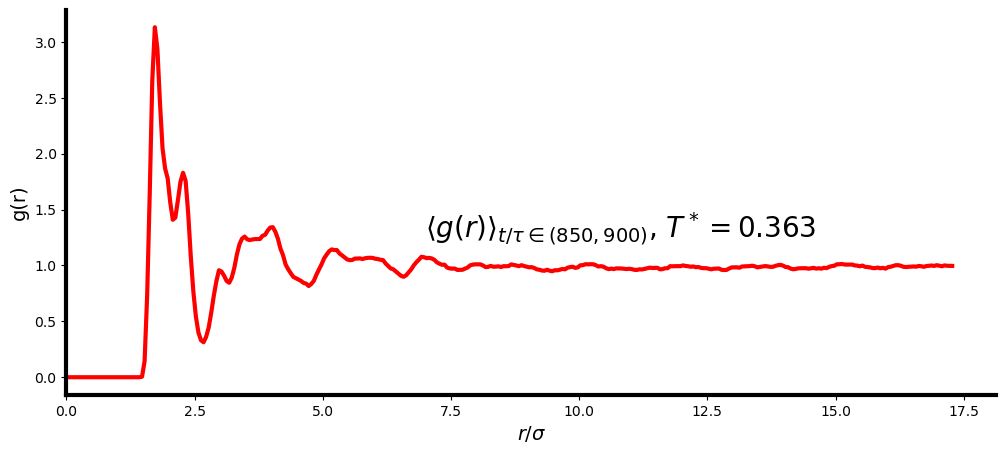

In [561]:
plt.figure(figsize = (12, 5))
# plt.scatter(r_vals[0:g_r.size -1], g_r[0:g_r.size -1], color = 'r', s = 3) ## scatter
plt.plot(r_vals[0:g_r.size -1], g_r[0:g_r.size -1], color = 'red', lw = 3) ## plot

plt.xlabel('$r/\\sigma$', fontsize = 14)
plt.ylabel('g(r)', fontsize = 14)
plt.text(7.0, 1.25, fr"$\langle g(r)\rangle_{{t/\tau \in ({t_start*0.001*10:.0f}, {t_end*0.001*10:.0f})}}$, $T^* = {T_ens:.3f}$", fontsize=20)

ax = plt.gca()

plt.xlim(0,)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

Detected peak fits:


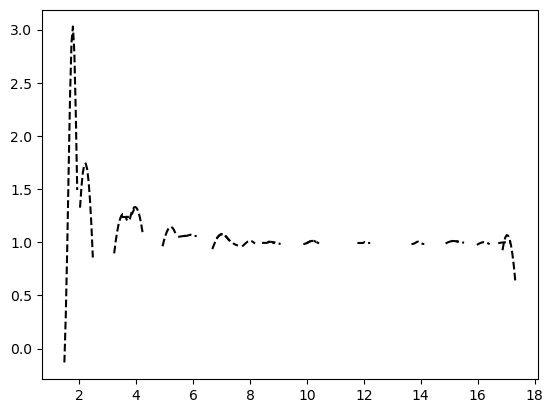

In [879]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

peaks, _ = find_peaks(g_r, height=1.0) 
def gaussian(x, amp, center, sigma, offset):
    return amp * np.exp(-(x - center)**2 / (2 * sigma**2)) + offset


print("Detected peak fits:")

popt_list = []
for peak in peaks:
    window = 5  
    start = max(peak - window, 0)
    end = min(peak + window, r_vals.size)

    x_data = r_vals[start:end]
    y_data = g_r[start:end]

    init_guess = [max(y_data)-min(y_data), r_vals[peak], 0.2, min(y_data)]
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=init_guess)
    popt_list.append(popt)
    plt.plot(x_data, gaussian(x_data, *popt), 'k--')
popt_list = np.array(popt_list)
popt_list = popt_list[popt_list[:, 1] < 7.5]

In [889]:
## Unit orientation vector
omega__x = np.array(periodic(x[:,0:N]- x_COM ))
omega__y = np.array(periodic(y[:,0:N]- y_COM))
omega_magnitude = np.sqrt(omega__x**2 + omega__y**2)
omega_x = omega__x/omega_magnitude
omega_y = omega__y/omega_magnitude


In [888]:
def assign_orientation_colors(ref_x, ref_y,n_x, n_y):
    color_indices = np.zeros(3*N)
    ref_angle = np.atan2(ref_y, ref_x)
    mol_angle = np.atan2(n_y, n_x)
    angle = (mol_angle - ref_angle)%(2*np.pi)
    color_indices = (np.rint(angle / (np.pi/3))%3).astype(int)
    return color_indices

In [894]:
def radial_peaks(tt, p, ps, m):
    t = tt # timesteps
    peak = p
    peaks = ps
    molnum = m#center circles on this molecule


    x_COM_t = x_COM[t,:]
    y_COM_t = y_COM[t,:]

    x_full0 = x[t, 0:N]
    x_full1 = x[t, N:2*N]
    x_full2 = x[t, 2*N:3*N]
    y_full0 = y[t, 0:N]
    y_full1 = y[t, N:2*N]
    y_full2 = y[t, 2*N:3*N]

    plt.figure(figsize = (6,6))

    SD = (peaks[peak])[2]
    if (SD>0.5):
        SD = 0.2
    r_min = (peaks[peak])[1] - SD
    r_max = (peaks[peak])[1] + SD
    r_min2 = (peaks[peak])[1] + 1*SD
    r_max2 = (peaks[peak])[1] + 2*SD


    xcenter = x_COM[t, molnum]
    ycenter = y_COM[t, molnum]
    ax = plt.gca()

    circle_inner = Circle((xcenter, ycenter), r_min,
                    facecolor='none', edgecolor='black', alpha=1, linestyle = '--', linewidth = 1.2)
    circle_outer = Circle((xcenter, ycenter), r_max,
                    facecolor='none', edgecolor='black', alpha=1, linestyle = '--', linewidth = 1.2)


    dx = periodic(x_COM[t,:] - xcenter)
    dy = periodic(y_COM[t,:] - ycenter)
    r2 = dx**2 + dy**2
    mask = (r2 >= r_min**2) & (r2 <= r_max**2)
    mask2 = (r2 >= r_min2**2) & (r2 <= r_max2**2)
    in_annulus = np.where(mask)[0]
    in_annulus2 = np.where(mask2)[0]

    ### Plot Molecules 
    colors = ['#1E4886', '#240547', '#86425D']

    ### Assign colors by relative orientation to molecule
    omega_molx = omega_x[t, molnum]
    omega_moly = omega_y[t, molnum]
    cols = assign_orientation_colors(omega_molx, omega_moly, omega_x[t,:], omega_y[t,:])
    indices = [colors[cols[i]] for i in range(N)]

    highlighted = set(in_annulus)
    highlighted2 = set(in_annulus2)
    alph = [0.2 if i not in highlighted else 0.8 for i in range(N)]
    # alph = [0.9 if i in highlighted else 0.45 if i in highlighted2 else 0.1 for i in range(N)]
    ss = 460


    plt.scatter(x_full0, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(xcenter, ycenter, color = 'k', s = 30, marker = 'x')

    plt.xlim(xcenter-8,xcenter+8)
    plt.ylim(ycenter-8,ycenter+8)

    ax.add_patch(circle_inner)
    ax.add_patch(circle_outer)

    for spine in ax.spines.values():
        spine.set_linewidth(3)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    plt.xlabel(f"$r/\\sigma$ = {peaks[peak][1]:.3f}", fontsize = 40)


    plt.show()

    print(f"Molecule number {molnum}")



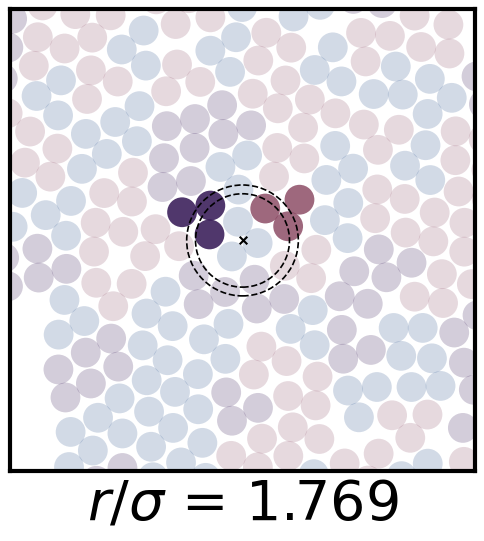

Molecule number 87


In [907]:
####################### Choose Parameters for below plot
t = 145000 # timesteps
peak = 0
peaks = popt_list
molnum = 87#center circles on this molecule
#######################

radial_peaks(t, peak, peaks, molnum)


In [915]:
omega_x.shape

(150001, 300)

In [916]:
theta_ = np.arctan2(omega_y[1:,:], omega_x[1:,:])

In [917]:
theta_.shape

(150000, 300)

In [1037]:
def radial_orientation(ts, te):
    distance_max = 7.5
    distance_increment = 0.05

    dists = np.arange(0, distance_max, distance_increment)
    theta_dists_total = np.zeros(dists.size)
    pairs_total = np.zeros(dists.size)

    for t in range(ts, te):
        dx = periodic(x_COM[t, :, None] - x_COM[t, None, :])
        dy = periodic(y_COM[t, :, None] - y_COM[t, None, :])
        r = np.sqrt(dx**2 + dy**2)

        theta_diff = np.abs(theta_[t, :, None] - theta_[t, None, :])
        theta_diff = np.mod(theta_diff, np.pi / 3)
        iu, ju = np.triu_indices(N, k=1)
        r_vals = r[iu, ju]
        theta_vals = theta_diff[iu, ju]

        bin_indices = np.floor(r_vals / distance_increment).astype(int)
        valid = (bin_indices >= 0) & (bin_indices < dists.size)
        bin_indices = bin_indices[valid]
        theta_vals = theta_vals[valid]

        counts = np.bincount(bin_indices, minlength=dists.size)
        sums = np.bincount(bin_indices, weights=theta_vals, minlength=dists.size)

        theta_dists_total += sums
        pairs_total += counts

    theta_dists_mean = np.divide(theta_dists_total, pairs_total, where=pairs_total > 0)
    return theta_dists_mean


In [1038]:
# Distances 
dists = np.arange(0, 7.5, 0.05)

In [1039]:
r1 = radial_orientation(135000, 150000)
r2 = radial_orientation(115000, 130000)
r3 = radial_orientation(95000, 110000)
r4 = radial_orientation(75000, 90000)
r5 = radial_orientation(55000, 70000)

In [1025]:
# r1 *= np.pi
# r2 *= np.pi
# r3 *= np.pi
# r4 *= np.pi
# r5 *= np.pi

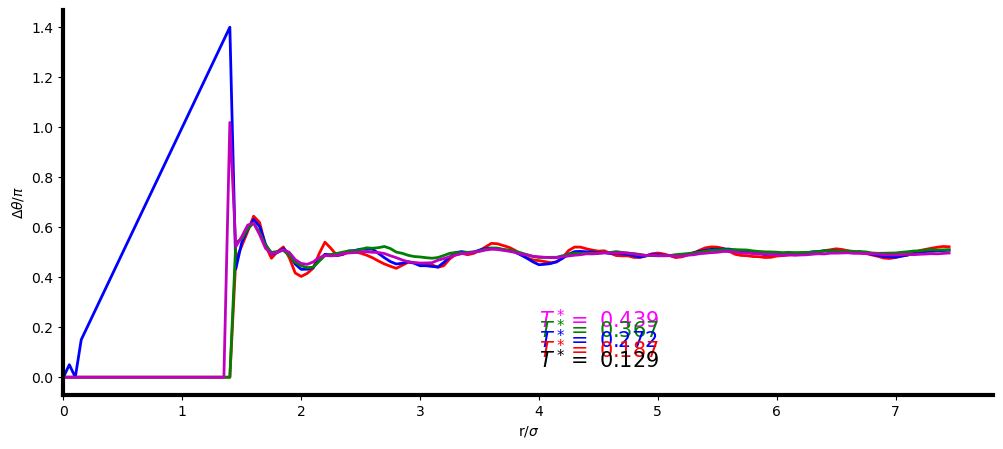

In [1044]:
plt.figure(figsize = (12, 5))
# plt.plot(dists, r1, lw = 2, color = 'k')
plt.plot(dists, r2, lw = 2, color = 'r')
plt.plot(dists, r3, lw = 2, color = 'b')
plt.plot(dists, r4, lw = 2, color = 'g')
plt.plot(dists, r5, lw = 2, color = 'm')
plt.xlim(0,)
# plt.ylim(0, np.pi)

plt.text(4, 0.2, f"$T^* = $ {np.mean(T[55000:70000]):.3f}", color = 'magenta', fontsize = 15)
plt.text(4, 0.16, f"$T^* = $ {np.mean(T[75000:90000]):.3f}", color = 'green', fontsize = 15)
plt.text(4, 0.12, f"$T^* = $ {np.mean(T[95000:110000]):.3f}", color = 'blue', fontsize = 15)
plt.text(4, 0.08, f"$T^* = $ {np.mean(T[115000:130000]):.3f}", color = 'red', fontsize = 15)
plt.text(4, 0.04, f"$T^* = $ {np.mean(T[135000:150000]):.3f}", color = 'black', fontsize = 15)



ax = plt.gca()
plt.xlabel("r/$\\sigma$")
plt.ylabel("$\\Delta \\theta / \\pi$")
plt.xlim(0,)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

# Order Parameter

In [511]:
## Unit orientation vector
omega__x = np.array(periodic(x[:,0:N]- x_COM ))
omega__y = np.array(periodic(y[:,0:N]- y_COM))
omega_magnitude = np.sqrt(omega__x**2 + omega__y**2)
omega_x = omega__x/omega_magnitude
omega_y = omega__y/omega_magnitude

In [ ]:
# Radial order parameter


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


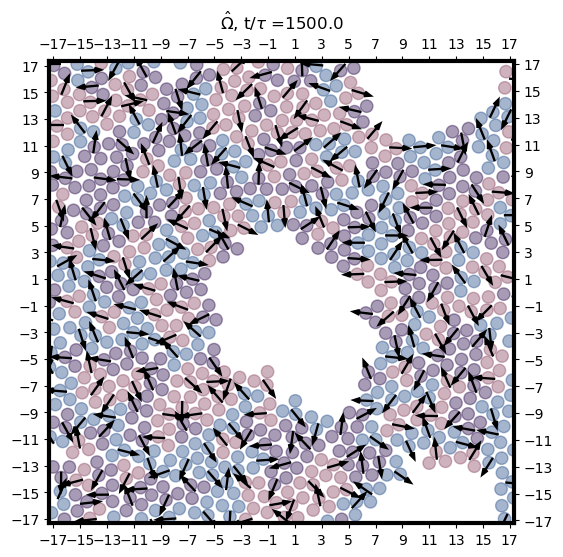

In [580]:

### Visualize one state

t = 150000  


def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(t) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])


L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 0.4
ss = 80

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)


plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


x0 = x_COM[t,:]
y0 = y_COM[t,:]
u = omega_x[t,:]
v = omega_y[t,:]
plt.quiver(x0, y0, u, v, scale=20, width=0.005, headwidth=3, headlength=4)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)

plt.gca().set_aspect('equal')

plt.title("$\\hat{\\Omega}$, t/$\\tau$ ="+ f"{t*0.01}")
plt.show()


In [581]:
def get_s_m(m):
    theta_j = np.arctan2(omega_y[1:, :], omega_x[1:, :])
    s_m = np.abs(np.sum(np.exp(1j * m * theta_j), axis=1) / N)
    return s_m

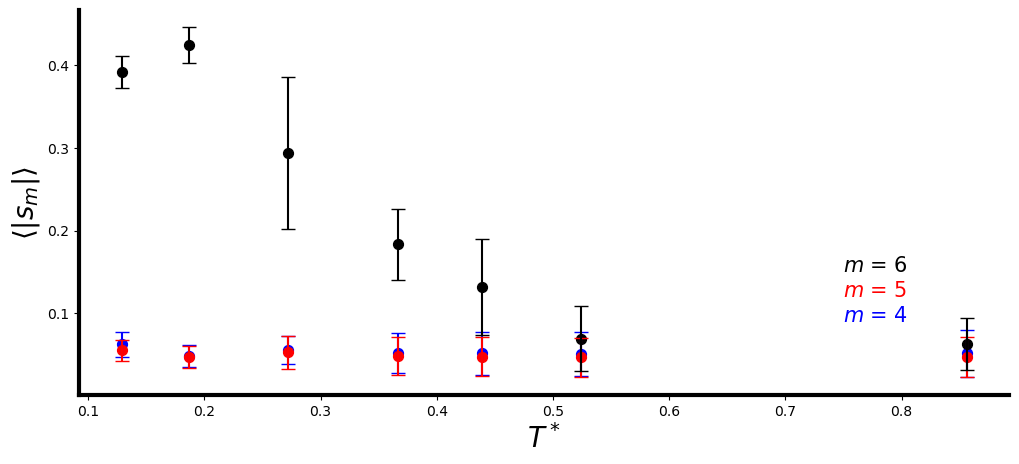

In [519]:
################
start = np.array([15000, 35000, 55000, 75000, 95000, 115000, 135000])
end = np.array([30000, 50000, 70000, 90000, 110000, 130000, 150000])
################

def order_temp(start, end, s_m):
    s_mmean  = np.mean(s_m[start-1:end])
    temp_mean = np.mean(T[start-1:end])
    return (s_mmean, temp_mean)

def mean_s_m(m):
    s_m = get_s_m(m)
    s_mean = []
    temp_mean = []
    s_mean = [order_temp(start[i], end[i], s_m)[0] for i in range(start.size)]
    temp_mean = [order_temp(start[i], end[i], s_m)[1] for i in range(start.size)]
    s_m_var = np.array([np.sum((s_m[start[i]:end[i]] - s_mean[i])**2)/(end[i]-start[i]-1) for i in range(start.size)])
    s_m_SD = np.array(s_m_var**0.5)
    return s_mean, temp_mean, s_m_SD

s6, t6, SD6 = mean_s_m(6)
s5, t5, SD5 = mean_s_m(5)
s4, t4, SD4 = mean_s_m(4)
s3, t3, SD3 = mean_s_m(3)



plt.figure(figsize = (12,5))



plt.scatter(t4, s4, color = 'b', s = 50)
plt.errorbar(t4, s4, yerr=SD4, fmt='none', capsize=5, elinewidth=1.5, color = 'b')

plt.scatter(t5, s5, color = 'r', s = 50)
plt.errorbar(t5, s5, yerr=SD5, fmt='none', capsize=5, elinewidth=1.5, color = 'r')

plt.scatter(t6, s6, color = 'k', s = 50)
plt.errorbar(t6, s6, yerr=SD6, fmt='none', capsize=5, elinewidth=1.5, color = 'k')

# plt.scatter(t3, s3, color = 'g', s = 50)
# plt.errorbar(t3, s3, yerr=SD3, fmt='none', capsize=5, elinewidth=1.5, color = 'g')

plt.xlabel('$T^*$', fontsize = 20)
plt.ylabel('$\\langle |s_m| \\rangle$', fontsize = 20)
plt.text(0.75, 0.15, "$m$ = 6", color= 'k', fontsize = 15)
plt.text(0.75, 0.12, "$m$ = 5", color= 'r', fontsize = 15)
plt.text(0.75, 0.09, "$m$ = 4", color= 'b', fontsize = 15)

ax = plt.gca()
# plt.xlim(0.25, 0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)

plt.show()


In [609]:
## Compute n^

theta_j = np.arctan2(omega_y[0:, :], omega_x[0:, :])
def n_hat(m):
    Q_1 = np.sum(np.cos(np.abs(theta_j*m)), axis = 1)/N
    Q_2 = np.sum(np.sin(np.abs(theta_j*m)), axis = 1)/N
    theta0 = np.arctan2(Q_1, Q_2)
    return np.cos(m/2*theta0), np.sin(m/2*theta0)


In [610]:
n_6 = n_hat(6)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


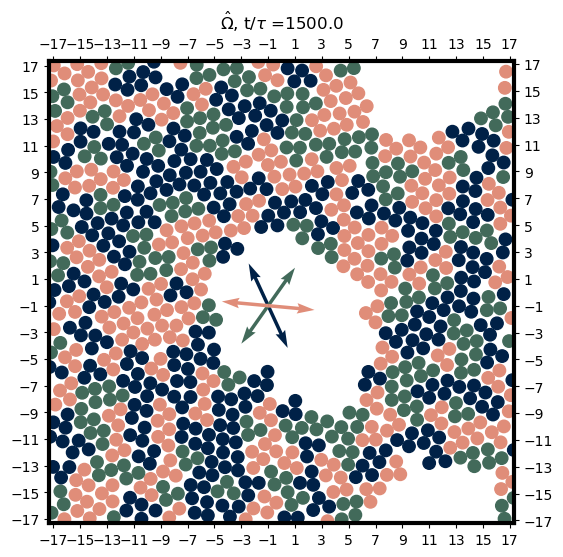

In [711]:
##############################################
## Set arrows position (in void)
arrows_x = -1
arrows_y = -1
alph = 1
ss = 80
##############################################

def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(t) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])

plt.figure(figsize = (6,6))

# colors = ['#4E3629', '#FFC72C', '#C00404'] # Brown U Colors !
colors = ['#002147', '#E08D79', '#426A5A']  # oxford colors


### ss = 285 for N = 200
indices = assign_orientation_colors(n_6[0][t], n_6[1][t], omega_x[t,:], omega_y[t,:]) 
cols = [colors[indices[i]] for i in range(N)]
plt.scatter(x0, y0, color = cols, s = ss, alpha = alph)
plt.scatter(x00, y00, color = cols, s = ss, alpha = alph)
plt.scatter(x000, y000, color = cols, s = ss, alpha = alph)



plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


x0 = x_COM[t,:]
y0 = y_COM[t,:]
u = omega_x[t,:]
v = omega_y[t,:]
# plt.quiver(x0, y0, u, v, scale=20, width=0.005, headwidth=3, headlength=4)

plt.quiver(arrows_x,arrows_y,n_6[0][t], n_6[1][t], scale = 10, color = cols[0])
plt.quiver(arrows_x,arrows_y,-n_6[0][t], -n_6[1][t], scale = 10, color = cols[0])
plt.quiver(arrows_x,arrows_y,n_6[0][t]*np.cos(np.pi/3) + n_6[1][t]*np.sin(np.pi/3), -n_6[0][t]*np.sin(np.pi/3) + n_6[1][t]*np.cos(np.pi/3), scale = 10, color = cols[1])
plt.quiver(arrows_x,arrows_y,-(n_6[0][t]*np.cos(np.pi/3) + n_6[1][t]*np.sin(np.pi/3)), -(-n_6[0][t]*np.sin(np.pi/3) + n_6[1][t]*np.cos(np.pi/3)), scale = 10, color = cols[1])
plt.quiver(arrows_x,arrows_y,n_6[0][t]*np.cos(2*np.pi/3) + n_6[1][t]*np.sin(2*np.pi/3), -n_6[0][t]*np.sin(2*np.pi/3) + n_6[1][t]*np.cos(2*np.pi/3), scale = 10, color = cols[2])
plt.quiver(arrows_x,arrows_y,-(n_6[0][t]*np.cos(2*np.pi/3) + n_6[1][t]*np.sin(2*np.pi/3)), -(-n_6[0][t]*np.sin(2*np.pi/3) + n_6[1][t]*np.cos(2*np.pi/3)), scale = 10, color = cols[2])

# plt.text(-3.8,9.5, "$\\hat{n}$", color = 'red', fontsize = 20)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)

ax = plt.gca().set_aspect('equal')

plt.title("$\\hat{\\Omega}$, t/$\\tau$ =" + f"{t*0.01}")
plt.show()


In [912]:
# Count nearest neighbors; recompute order parameter without molecules in voids


145000

# Time Correlation Functions

In [749]:
def time_correlation(A, tau, tau_min, tau_lim): 
    tcorr = np.zeros(tau)
    for t in range(0, tau):
        sum = 0
        d = 0
        for t0 in range(tau_min, min(tau_lim - t, tau_lim)):
            sum += A[t0]*A[t0+t]
            d+=1
        tcorr[t] = sum/(d)
    return tcorr
def plot_time_correlation(arr, time_min, time_max, )

In [760]:
t_x =  time_correlation(s_6, 5000, 0, s_6.size)

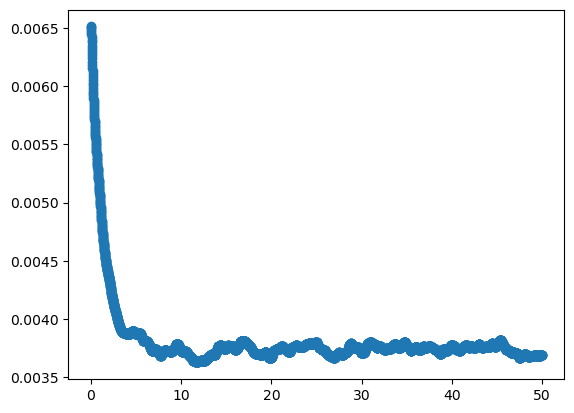

In [761]:
plt.scatter(np.arange(t_x.size)/100, t_x)

In [ ]:
# Orientational Time-Correlation Function

